In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy import linalg

from src import eigenproblem
from src.utils import print_matrix

pd.options.display.float_format = "{:,.16f}".format
np.set_printoptions(precision=16, suppress=True)


def answer(a: np.array, eps: float) -> None:
    print("Initial method:", end="")
    print_matrix(a)

    print("Power method")
    (eigenvalue1, eigenvector1, count1) = eigenproblem.solve_partial(
        a, eigenproblem.PartialEigenproblemMethod.PowerMethod
    )
    print("Maximum absolute eigenvalue:", eigenvalue1)
    print("Eigenvector:", eigenvector1)
    print("Amount of iterations:", count1)

    print("Dot product method")
    (eigenvalue2, eigenvector2, count2) = eigenproblem.solve_partial(
        a, eigenproblem.PartialEigenproblemMethod.DotProductMethod
    )
    print("Maximum absolute eigenvalue:", eigenvalue2)
    print("Eigenvector:", eigenvector2)
    print("Amount of iterations:", count2)

In [10]:
a1 = np.array([[1, 4, 2], [-1, 5, 1], [0, 0, 1]])
answer(a1, 10e-6)

Initial method:      
 1 4 2
-1 5 1
 0 0 1
Power method
Maximum absolute eigenvalue: 3.005469752327384
Eigenvector: [-0.8939383183046223 -0.4481900077720428  0.                ]
Amount of iterations: 555
Dot product method
Maximum absolute eigenvalue: 3.003864995332163
Eigenvector: [-0.8937335970885483 -0.4485981023535037  0.                ]
Amount of iterations: 391


In [11]:
a1_prime = np.array([[1, 0, 0], [0, 3, 1], [0, 0, 3]])
answer(a1_prime, 10e-6)

Initial method:     
1 0 0
0 3 1
0 0 3
Power method
Maximum absolute eigenvalue: 3.005465381675248
Eigenvector: [0.                 0.9999851185164856 0.0054555243167468]
Amount of iterations: 526
Dot product method
Maximum absolute eigenvalue: 3.003860931985301
Eigenvector: [0.                 0.9999704286119367 0.0076903772117947]
Amount of iterations: 387


In [12]:
a2 = linalg.hilbert(4)
answer(a2, 10e-12)

Initial method:                                                                           
1.0000000000000000 0.5000000000000000 0.3333333333333333 0.2500000000000000
0.5000000000000000 0.3333333333333333 0.2500000000000000 0.2000000000000000
0.3333333333333333 0.2500000000000000 0.2000000000000000 0.1666666666666667
0.2500000000000000 0.2000000000000000 0.1666666666666667 0.1428571428571428
Power method
Maximum absolute eigenvalue: 1.500214258708001
Eigenvector: [0.7925971479836369 0.4519302135711288 0.3224261537015081
 0.25217101038583  ]
Amount of iterations: 5
Dot product method
Maximum absolute eigenvalue: 1.5002142698859904
Eigenvector: [0.7926036266178447 0.4519260899424578 0.3224204821296627
 0.2521652890562811]
Amount of iterations: 5


In [13]:
a3 = np.array([[1, 4, 2], [-1, 5, 1], [0, 0, 1]])

iter_count = 100

x = np.linspace(10e-6, 10e-12, num=iter_count, endpoint=False)
power_method_count = []
dot_product_method_count = []
for i in range(iter_count):
    (_, _, count1) = eigenproblem.solve_partial(
        a3, eigenproblem.PartialEigenproblemMethod.PowerMethod, eps=x[i]
    )
    power_method_count.append(count1)
    (_, _, count2) = eigenproblem.solve_partial(
        a3, eigenproblem.PartialEigenproblemMethod.DotProductMethod, eps=x[i]
    )
    dot_product_method_count.append(count2)

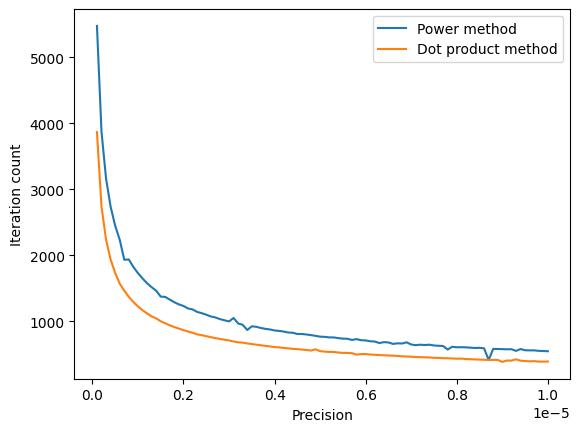

In [14]:
(power_method,) = plt.plot(x, power_method_count, label="Power method")
(dot_product_method,) = plt.plot(
    x, dot_product_method_count, label="Dot product method"
)
plt.legend(handles=[power_method, dot_product_method], loc="best")
plt.xlabel("Precision")
plt.ylabel("Iteration count")
plt.show()